In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import fates_xarray_funcs
from fates_xarray_funcs import monthly_to_annual

In [3]:
cases = {'S0':'f19_0007_trendyS0_39e91e09b5_c2da27fd',
         'S1':'f19_0008_trendyS1_39e91e09b5_c2da27fd',
         'S2':'f19_0010_trendyS2_hybrid_39e91e09b5_c2da27fd',
         'S3':'f19_0009_trendyS3_parta_39e91e09b5_c2da27fd',
         'S3b':'f19_0011_trendyS3_partb_hybrid_39e91e09b5_c2da27fd'}

start_year = {'S0':1701,
         'S1':1701,
         'S2':1901,
         'S3':1701,
         'S3b':1901}

In [4]:
fins_annual = {}
for i, label in enumerate(cases):
    case = cases[label]
    fins_annual.update({label:xr.open_dataset('/global/homes/c/cdkoven/scratch/e3sm_scratch/pm-cpu/'+case+'/run/'+case+'.annual.sofar.nc')})
    fins_annual[label]['time'] = np.arange(len(fins_annual[label]['time'])) + start_year[label]

In [5]:
fins_monthly = {}
for i, label in enumerate(cases):
    case = cases[label]
    fins_monthly.update({label:xr.open_dataset('/global/homes/c/cdkoven/scratch/e3sm_scratch/pm-cpu/'+case+'/run/'+case+'.monthly.sofar.nc')})
    fins_monthly[label]['time'] = np.arange(len(fins_monthly[label]['time']))/12. + start_year[label]
                                       

In [6]:
area_elmvars = fins_annual['S0']['area'] * 1e6 * fins_annual['S0']['landfrac']  ### area in m^2
area_fatesvars = fins_annual['S0']['area'] * 1e6 * fins_annual['S0']['landfrac'] * fins_annual['S0']['FATES_FRACTION'].isel(time=0)  ### area in m^2

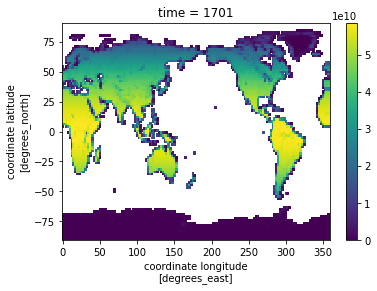

In [7]:
#fins_annual['S0']['landfrac'].plot()
#fins_annual['S0']['FATES_FRACTION'].isel(time=0).plot()
area_fatesvars.plot()
#area_elmvars.plot()

(270.0, 440.0)

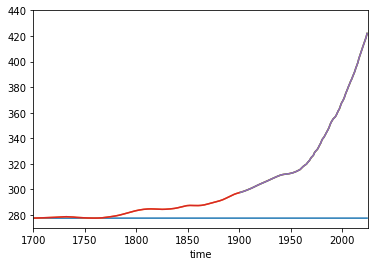

In [8]:
(1e6*fins_annual['S0']['PCO2'].mean(dim=['lat','lon'])/fins_annual['S0']['PBOT'].mean(dim=['lat','lon'])).plot()
(1e6*fins_annual['S1']['PCO2'].mean(dim=['lat','lon'])/fins_annual['S1']['PBOT'].mean(dim=['lat','lon'])).plot()
(1e6*fins_annual['S2']['PCO2'].mean(dim=['lat','lon'])/fins_annual['S2']['PBOT'].mean(dim=['lat','lon'])).plot()
(1e6*fins_annual['S3']['PCO2'].mean(dim=['lat','lon'])/fins_annual['S3']['PBOT'].mean(dim=['lat','lon'])).plot()
(1e6*fins_annual['S3b']['PCO2'].mean(dim=['lat','lon'])/fins_annual['S3b']['PBOT'].mean(dim=['lat','lon'])).plot()

plt.xlim(1700,2025)
plt.ylim(270,440)

In [9]:
co2file = xr.open_dataset('/global/cfs/cdirs/e3sm/inputdata/atm/datm7/TRENDY2025/CO2field/fco2_datm_global_simyr_1700-2024_TRENDY_c250625.nc', decode_times=False)

(270.0, 440.0)

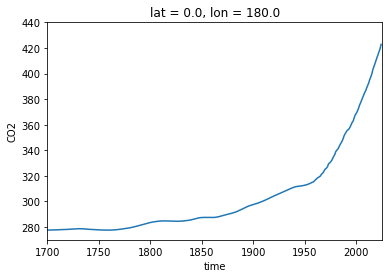

In [10]:
co2file['time'] = np.arange(len(co2file['time']))+1700.
co2file['CO2'].plot()
plt.xlim(1700,2025)
plt.ylim(270,440)

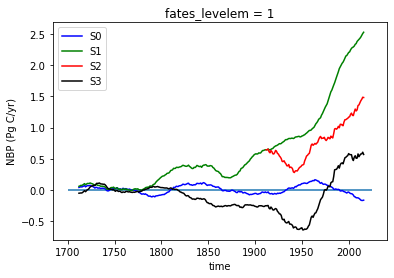

In [11]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S0']['NBP'] * area_elmvars + fins_monthly['S0']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0) * area_fatesvars *1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Blue', linestyle='solid', label='S0')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S1']['NBP'] * area_elmvars + fins_monthly['S1']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0) * area_fatesvars *1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Green', linestyle='solid', label='S1')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S2']['NBP'] * area_elmvars + fins_monthly['S2']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0) * area_fatesvars *1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Red', linestyle='solid', label='S2')
(fates_xarray_funcs.monthly_to_annual((xr.concat((fins_monthly['S3']['NBP'],fins_monthly['S3b']['NBP']),dim='time')* area_elmvars + xr.concat((fins_monthly['S3']['FATES_SEEDS_IN_EXTERN_EL'],fins_monthly['S3b']['FATES_SEEDS_IN_EXTERN_EL']),dim='time').isel(fates_levelem=0)* area_fatesvars *1e3))* 86400 * 365 * 1e-15 ).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Black', linestyle='solid', label='S3')
plt.ylabel('NBP (Pg C/yr)')
plt.hlines(0,xmin=1700, xmax=2025)
plt.legend()

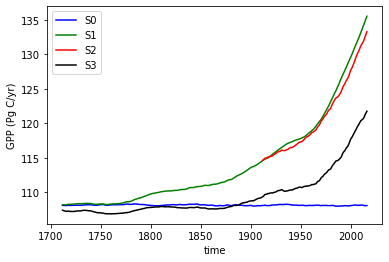

In [12]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S0']['FATES_GPP'] * area_fatesvars * 1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Blue', linestyle='solid', label='S0')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S1']['FATES_GPP'] * area_fatesvars * 1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Green', linestyle='solid', label='S1')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S2']['FATES_GPP'] * area_fatesvars * 1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Red', linestyle='solid', label='S2')
(fates_xarray_funcs.monthly_to_annual((xr.concat((fins_monthly['S3']['FATES_GPP'],fins_monthly['S3b']['FATES_GPP']),dim='time')* area_fatesvars * 1e3))* 86400 * 365 * 1e-15 ).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Black', linestyle='solid', label='S3')
plt.ylabel('GPP (Pg C/yr)')

plt.legend()

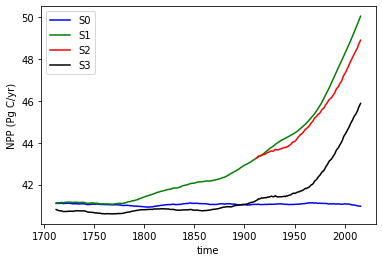

In [13]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S0']['FATES_NPP'] * area_fatesvars * 1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Blue', linestyle='solid', label='S0')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S1']['FATES_NPP'] * area_fatesvars * 1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Green', linestyle='solid', label='S1')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S2']['FATES_NPP'] * area_fatesvars * 1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Red', linestyle='solid', label='S2')
(fates_xarray_funcs.monthly_to_annual((xr.concat((fins_monthly['S3']['FATES_NPP'],fins_monthly['S3b']['FATES_NPP']),dim='time')* area_fatesvars * 1e3))* 86400 * 365 * 1e-15 ).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Black', linestyle='solid', label='S3')
plt.ylabel('NPP (Pg C/yr)')

plt.legend()

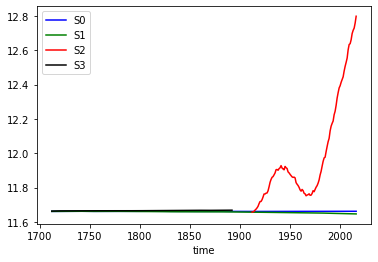

In [14]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S0']['TSA']-273.15) * fins_annual['S0']['area']).sum(dim=('lat','lon')) / fins_annual['S0']['area'].sum(dim=('lat','lon'))).rolling(time=20, center=True).mean().plot(color='Blue', linestyle='solid', label='S0')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S1']['TSA']-273.15) * fins_annual['S1']['area']).sum(dim=('lat','lon')) / fins_annual['S1']['area'].sum(dim=('lat','lon'))).rolling(time=20, center=True).mean().plot(color='Green', linestyle='solid', label='S1')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S2']['TSA']-273.15) * fins_annual['S2']['area']).sum(dim=('lat','lon')) / fins_annual['S2']['area'].sum(dim=('lat','lon'))).rolling(time=20, center=True).mean().plot(color='Red', linestyle='solid', label='S2')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S3']['TSA']-273.15) * fins_annual['S3']['area']).sum(dim=('lat','lon')) / fins_annual['S3']['area'].sum(dim=('lat','lon'))).rolling(time=20, center=True).mean().plot(color='Black', linestyle='solid', label='S3')

#plt.hlines(0,xmin=1700, xmax=†2025)
plt.legend()

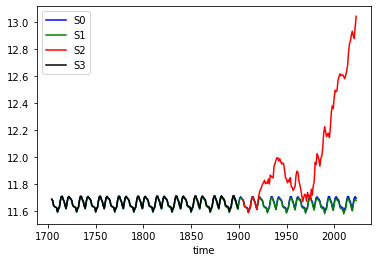

In [15]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S0']['TSA']-273.15) * fins_annual['S0']['area']).sum(dim=('lat','lon')) / fins_annual['S0']['area'].sum(dim=('lat','lon'))).rolling(time=5, center=True).mean().plot(color='Blue', linestyle='solid', label='S0')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S1']['TSA']-273.15) * fins_annual['S1']['area']).sum(dim=('lat','lon')) / fins_annual['S1']['area'].sum(dim=('lat','lon'))).rolling(time=5, center=True).mean().plot(color='Green', linestyle='solid', label='S1')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S2']['TSA']-273.15) * fins_annual['S2']['area']).sum(dim=('lat','lon')) / fins_annual['S2']['area'].sum(dim=('lat','lon'))).rolling(time=5, center=True).mean().plot(color='Red', linestyle='solid', label='S2')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S3']['TSA']-273.15) * fins_annual['S3']['area']).sum(dim=('lat','lon')) / fins_annual['S3']['area'].sum(dim=('lat','lon'))).rolling(time=5, center=True).mean().plot(color='Black', linestyle='solid', label='S3')

#plt.hlines(0,xmin=1700, xmax=†2025)
plt.legend()

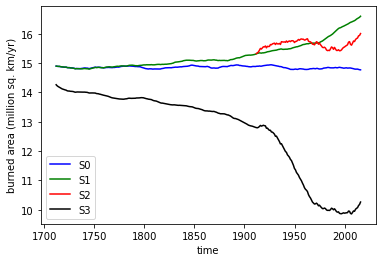

In [16]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S0']['FATES_BURNEDAREA_LU'].sum(dim='fates_levlanduse') * area_fatesvars ))* 86400 * 365 * 1e-12).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Blue', linestyle='solid', label='S0')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S1']['FATES_BURNEDAREA_LU'].sum(dim='fates_levlanduse') * area_fatesvars ))* 86400 * 365 * 1e-12).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Green', linestyle='solid', label='S1')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S2']['FATES_BURNEDAREA_LU'].sum(dim='fates_levlanduse') * area_fatesvars ))* 86400 * 365 * 1e-12).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Red', linestyle='solid', label='S2')
(fates_xarray_funcs.monthly_to_annual((xr.concat((fins_monthly['S3']['FATES_BURNEDAREA_LU'],fins_monthly['S3b']['FATES_BURNEDAREA_LU']),dim='time').sum(dim='fates_levlanduse')* area_fatesvars ))* 86400 * 365 * 1e-12).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Black', linestyle='solid', label='S3')
plt.ylabel('burned area (million sq. km/yr)')

plt.legend()

In [17]:
areas = fins_annual['S3']['area'].fillna(0.)
frac_notbareground = fins_annual['S3']['FATES_PATCHAREA_LU'].isel(time=0).sum(dim='fates_levlanduse').fillna(0.)
veg_areas = (areas * frac_notbareground).drop('time')


landfrac = fins_annual['S3']['landfrac'].fillna(0.)

veg_areas_landfrac = veg_areas * landfrac
#print(veg_areas_landfrac.sum())
#veg_areas_landfrac.plot()

In [18]:
### open the LUH2 driving file

luh2_file = xr.open_dataset('/global/homes/c/cdkoven/scratch/inputdata/luh2_trendy2025_1.9x2.5_850-2024_23jun2025.nc').rename_vars({'lat':'lats', 'lon':'lons'}).rename_dims({'lsmlat':'lat', 'lsmlon':'lon'}).rename_vars({'lats':'lat', 'lons':'lon'})
luh2_file['time'] = np.arange(len(luh2_file['time'])) + 850.

veg_area_luh = veg_areas.copy()
veg_area_luh['lat'] = luh2_file['lat']
veg_area_luh['lon'] = luh2_file['lon']

veg_areas_landfrac_luh = veg_areas_landfrac.copy()
veg_areas_landfrac_luh['lat'] = luh2_file['lat']
veg_areas_landfrac_luh['lon'] = luh2_file['lon']


In [19]:
secndry_lnd = ((luh2_file['secdf'].isel(time=slice(850,None)) + luh2_file['secdn'].isel(time=slice(850,None))) * veg_area_luh).sum(dim=['lat','lon'])
primary_lnd = ((luh2_file['primf'].isel(time=slice(850,None)) + luh2_file['primn'].isel(time=slice(850,None))) * veg_area_luh).sum(dim=['lat','lon'])
pastureland = ((luh2_file['pastr'].isel(time=slice(850,None))) * veg_area_luh).sum(dim=['lat','lon'])
rangeland = ((luh2_file['range'].isel(time=slice(850,None))) * veg_area_luh).sum(dim=['lat','lon'])
cropland = ((luh2_file['c3ann'].isel(time=slice(850,None)) + luh2_file['c3per'].isel(time=slice(850,None)) + luh2_file['c4ann'].isel(time=slice(850,None)) + luh2_file['c4per'].isel(time=slice(850,None)) + luh2_file['c3nfx'].isel(time=slice(850,None)) ) * veg_area_luh).sum(dim=['lat','lon'])


secndry_lnd2 = ((luh2_file['secdf'].isel(time=slice(850,None)) + luh2_file['secdn'].isel(time=slice(850,None))) * veg_areas_landfrac_luh).sum(dim=['lat','lon'])
primary_lnd2 = ((luh2_file['primf'].isel(time=slice(850,None)) + luh2_file['primn'].isel(time=slice(850,None))) * veg_areas_landfrac_luh).sum(dim=['lat','lon'])
pastureland2 = ((luh2_file['pastr'].isel(time=slice(850,None))) * veg_areas_landfrac_luh).sum(dim=['lat','lon'])
rangeland2 = ((luh2_file['range'].isel(time=slice(850,None))) * veg_areas_landfrac_luh).sum(dim=['lat','lon'])
cropland2 = ((luh2_file['c3ann'].isel(time=slice(850,None)) + luh2_file['c3per'].isel(time=slice(850,None)) + luh2_file['c4ann'].isel(time=slice(850,None)) + luh2_file['c4per'].isel(time=slice(850,None)) + luh2_file['c3nfx'].isel(time=slice(850,None)) ) * veg_areas_landfrac_luh).sum(dim=['lat','lon'])

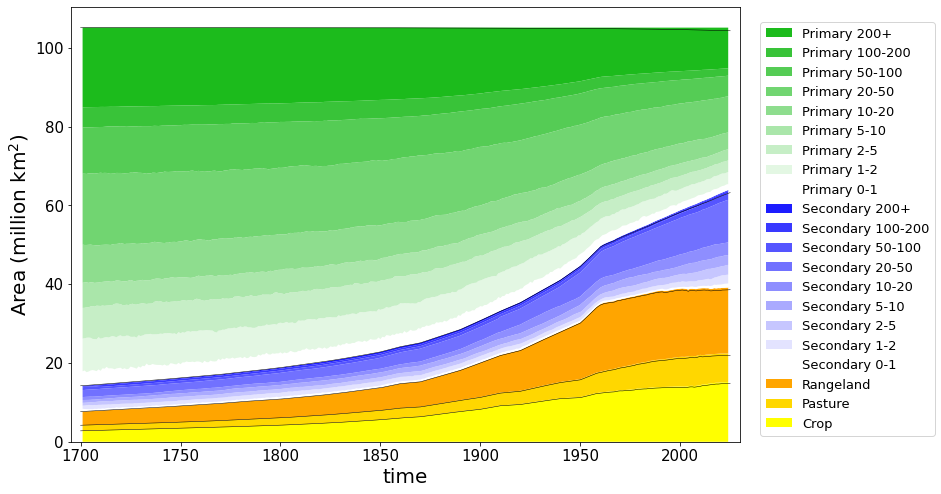

In [22]:
### repeat with age distributions separately on primary, secondary, and then no ages on other types

fig=plt.figure(figsize=(12,8))
#fig.set_fontsize(20)
age_areas_primary = (fins_annual['S3']['area']*fins_annual['S3']['landfrac']*xr.concat((fins_annual['S3']['FATES_PRIMARY_AREA_AP'],fins_annual['S3b']['FATES_PRIMARY_AREA_AP']),dim='time')).sum(dim=['lat','lon']).load()  * 1e-6
age_areas_secondary = (fins_annual['S3']['area']*fins_annual['S3']['landfrac']*xr.concat((fins_annual['S3']['FATES_SECONDARY_AREA_AP'],fins_annual['S3b']['FATES_SECONDARY_AREA_AP']),dim='time')).sum(dim=['lat','lon']).load()  * 1e-6
range_pasture_crop = ((fins_annual['S3']['area']*fins_annual['S3']['landfrac']*xr.concat((fins_annual['S3']['FATES_PATCHAREA_LU'],fins_annual['S3b']['FATES_PATCHAREA_LU']),dim='time').isel(fates_levlanduse=slice(4,1,-1))).sum(dim=['lat','lon']).load()  * 1e-6).rename({'fates_levlanduse':'fates_levage'})

age_areas = xr.concat((range_pasture_crop, age_areas_secondary,age_areas_primary), dim='fates_levage')

labels = ['Crop','Pasture','Rangeland','Secondary 0-1','Secondary 1-2','Secondary 2-5','Secondary 5-10','Secondary 10-20','Secondary 20-50','Secondary 50-100','Secondary 100-200','Secondary 200+','Primary 0-1','Primary 1-2','Primary 2-5','Primary 5-10','Primary 10-20','Primary 20-50','Primary 50-100','Primary 100-200','Primary 200+']
#colors = ['Yellow','Gold','Orange']
blue = xr.DataArray(np.array((1,1,0)), dims = 'rgb')
green = xr.DataArray(np.array((1,0.3,1)), dims = 'rgb')
b = xr.DataArray(np.arange(9)/9., dims = 'levs')
greens = (1.-green*b).transpose().data.tolist()
blues = (1.-blue*b).transpose().data.tolist()
golds = ['Yellow','Gold','Orange']
colors= golds + blues + greens

ax = fig.add_subplot(1, 1, 1)

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(axis='both', which='major', labelsize=15)


plt.stackplot(xr.concat((fins_annual['S3']['time'],fins_annual['S3b']['time']),dim='time'), age_areas.transpose(), labels=labels, colors=colors)
plt.xlim(1695., 2030.)
handles, labels = ax.get_legend_handles_labels()
plt.legend( handles[::-1], labels[::-1], fontsize=13, bbox_to_anchor=(1.3, 0.98))
plt.title('Global Land Use Type and Age Distributions')
plt.xlabel('Year')

#plt.vlines(1850, 0, 107, color='black', linewidth=0.5)


(cropland2 * 1e-6 ).plot(color='black',linewidth=0.5)
((cropland2+pastureland2) * 1e-6 ).plot(color='black' ,linewidth=0.5)
((cropland2+pastureland2 + rangeland2) * 1e-6 ).plot(color='black',linewidth=0.5)
((cropland2+pastureland2 + rangeland2 + secndry_lnd2) * 1e-6 ).plot(color='black',linewidth=0.5)
((cropland2+pastureland2 + rangeland2 + secndry_lnd2 + primary_lnd2) * 1e-6 ).plot(color='black',linewidth=0.5)
plt.ylabel('Area (million km$^2$)')

#plt.xlabel('',fontsize='large')
plt.savefig('lu_types_and_ages_1700start.png',dpi=300, bbox_inches = 'tight')

